<a href="https://colab.research.google.com/github/teegwende/WQPandEntitiesDensity/blob/main/genergraphEval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [47]:
from pandas import read_csv, DataFrame
import pandas as pd

# df = read_csv('/gdrive/MyDrive/traitement_ordinaire/datarep/predictions.csv', index_col='periode', parse_dates=True)
df = read_csv('/gdrive/MyDrive/traitement_ordinaire/datarep/predictionsExtin.csv', index_col='periode', parse_dates=True)

In [51]:
#Distribution des masses
for t,ph in zip(df['TEMP'],df['PH']):
  if (t<18 or t>32) or (ph<4 or ph>10):
    print("letal")
    noninfeste=1
    infeste=0
    omega=1-noninfeste
  elif (t>=25 and t<=28) or (ph>=6.5 and ph<=8.2):
    # print("optimale")
    noninfeste=0
    infeste=70.43/100.0
    omega=1-infeste
  else:
    print("Favorable")
    noninfeste=0
    infeste=29.57/100.0
    omega=1-infeste
      
  listemasses1={'A':round(infeste,3),'B':round(noninfeste,3),'A_B':round(omega,3)}


print("infeste",infeste)
print("noninfeste",noninfeste)
print("omega",omega)

r0=2

if (r0>1):
  noninfeste2=0
  infeste2=85.22/100.0
  omega2=1-infeste2

if (r0<1):
  noninfeste2=0
  infeste2=2.27/100.0
  omega2=1-infeste2

if (r0==1):
  noninfeste2=0
  infeste2=0
  omega2=1-infeste2

listemasses2={'A':round(infeste2,3),'B':round(noninfeste2,3),'A_B':round(omega2,3)}
print("infeste2",infeste2)
print("noninfeste2",noninfeste2)
print("omega2",omega2)

infeste 0.7043
noninfeste 0
omega 0.29569999999999996
infeste2 0.8522
noninfeste2 0
omega2 0.14780000000000004


In [52]:
#Affaiblissement
alpha1=0
alpha2=0

def affaiblissement(m1,m2,omega,alpha):
  m1_aff=(1-alpha)*m1
  m2_aff=(1-alpha)*m2
  omega_aff=(1-alpha)*omega+alpha
  return m1_aff,m2_aff,omega_aff

print(affaiblissement(infeste2,noninfeste2,omega2,0.1))


#Combinaison (A REVENIR SUR LE CALCUL DU DEGRE DE CONFLIT)
def Combinaison(listemasses1,listemasses2):

  import pandas as pd
  matricefusion=[]
  calcinter=[]
  degConflit=0
  sumA=0
  sumB=0
  sumAB=0

#BLOC d'instructions pour faire le calcul des masses combinées et du degré de conflit
  for etat1, m1 in listemasses1.items():
    calcinter=[]
    if etat1=='A':
      for etat2,m2 in listemasses2.items():
        if not ((etat1 in etat2 or etat2 in etat1) ):
          degConflit+=m1*m2

        calcinter.append(round(m1*m2,3))
        if (etat2=='A' or etat2=='A_B'):
          sumA+=m1*m2

    if etat1=='B':
      for etat2,m2 in listemasses2.items():
        if not ((etat1 in etat2 or etat2 in etat1) ):
          degConflit+=m1*m2

        calcinter.append(round(m1*m2,3))
        if (etat2=='B' or etat2=='A_B'):
          sumB+=m1*m2

    if etat1=='A_B':
      for etat2,m2 in listemasses2.items():
        if not ((etat1 in etat2 or etat2 in etat1) ):
          degConflit+=m1*m2

        calcinter.append(round(m1*m2,3))
        if etat2=='A':
          sumA+=m1*m2
        if etat2=='B':
          sumB+=m1*m2
        if etat2=='A_B':
          sumAB+=m1*m2

    matricefusion.append(calcinter)
  listem12={'A':sumA/(1-degConflit),'B':sumB/(1-degConflit),'A_B':sumAB/(1-degConflit)}
  print("degConflit=",degConflit)
  return matricefusion,listem12

(0.76698, 0.0, 0.23302000000000006)


In [53]:
resultmat,listem12=Combinaison(listemasses1,listemasses2)
lescolonnes=[]
leslignes=[]

for etat,m12 in listem12.items():
    print("etat",etat)
    print("masse m12",m12)

#BLOC d'instructions pour former les lignes et les colonnes du dataframe
for etat1, m1 in listemasses1.items():
  nomcol=etat1+" ("+str(m1)+")"
  lescolonnes.append(nomcol)

for etat2, m2 in listemasses2.items():
  nomligne=etat2+' ('+str(m2)+')'
  leslignes.append(nomligne)


df = pd.DataFrame(resultmat)
df.columns=lescolonnes
df.index=leslignes

print(df)

degConflit= 0.0
etat A
masse m12 0.9561919999999998
etat B
masse m12 0.0
etat A_B
masse m12 0.04380799999999999
             A (0.704)  B (0)  A_B (0.296)
A (0.852)        0.600    0.0        0.104
B (0)            0.000    0.0        0.000
A_B (0.148)      0.252    0.0        0.044


In [56]:
#Decision
resultmat,listem12=Combinaison(listemasses1,listemasses2)
decA=0
decB=0
decAB=0
for etat,m12 in listem12.items():
  print("etat =",etat)
  print("m12 =",m12)
  if 'A' in etat :
    decA+=m12
  if 'B' in etat :
    decB+=m12
  if 'A_B' in etat :
    decAB+=m12
  print(decA, decB,decAB)

print(min(decA,decB,decAB))
print(max(decA,decB,decAB))

degConflit= 0.0
etat = A
m12 = 0.9561919999999998
0.9561919999999998 0 0
etat = B
m12 = 0.0
0.9561919999999998 0.0 0
etat = A_B
m12 = 0.04380799999999999
0.9999999999999998 0.04380799999999999 0.04380799999999999
0.04380799999999999
0.9999999999999998


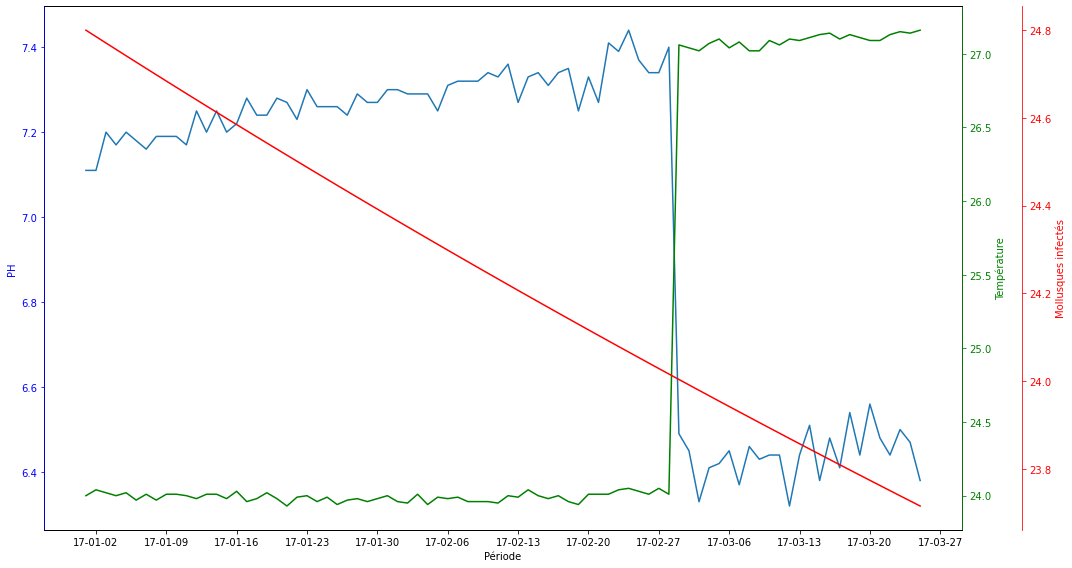

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.plot(df.index,df['PH'])
ax1.set_ylabel('PH', color='blue')
ax1.set_xlabel("Période")
ax1.tick_params(axis='y',colors='blue')

ax2=ax1.twinx()
ax2.plot(df.index,df['TEMP'], color='green')
ax2.set_ylabel('Température', color='green')
ax2.tick_params(axis='y',colors='green')

entiteax3="Mollusques infectés"
ax3=ax1.twinx()
ax3.plot(df.index,df[entiteax3], color='red')
ax3.spines['right'].set_position(('outward',60))

ax3.set_ylabel(entiteax3, color='red')

ax3.tick_params(axis='y',colors='red')
ax3.xaxis.set_major_formatter(DateFormatter("%y-%m-%d"))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=7))

plt.xticks(rotation=45, ha='right',fontsize=14)
# ax4=ax1.twinx()
# ax4.plot(df.index,df['Mollusques infectés'], color='yellow')
# ax4.spines['left'].set_position(('outward',60))
# ax4.set_ylabel('Mollusques infectés', color='yellow')
# ax4.tick_params(axis='y',colors='yellow')

ax2.spines['right'].set_color('green')
ax3.spines['right'].set_color('red')
ax3.spines['left'].set_color('blue')

fig.tight_layout() # Pour la prise de l'axe décalée dans la génération réelle du graphe
plt.savefig("/gdrive/MyDrive/traitement_ordinaire/datarep/eaunonInfeste.pdf")
plt.show()